In [7]:
import os
from transformers import AutoProcessor, VisionEncoderDecoderModel, AutoTokenizer
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [8]:
# Load your fine-tuned Nepali OCR model and processor
processor = AutoProcessor.from_pretrained("model/part_3/nepali_ocr_processor", use_fast=False)
model = VisionEncoderDecoderModel.from_pretrained("model/part_3/nepali_ocr_model")

Config of the encoder: <class 'transformers.models.deit.modeling_deit.DeiTModel'> is overwritten by shared encoder config: DeiTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 384,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "model_type": "deit",
  "num_attention_heads": 6,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.48.2"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 384,
  "d_model": 256,
  "decoder_attention_heads": 8,
  "decoder_ffn_dim": 1024,
  "decode

In [9]:
def ocr_detect(path):
    # Open and preprocess the image
    image = Image.open(path).convert("RGB")


    image_cv = np.array(image)
    
    # Step 1: Denoise the full image (this version will serve as our 'clean' background)
    denoised_image = cv2.bilateralFilter(image_cv, d=9, sigmaColor=75, sigmaSpace=75)
    
    # Step 2: Create a mask for the text
    # Convert original image to grayscale for mask creation
    gray = cv2.cvtColor(image_cv, cv2.COLOR_RGB2GRAY)
    # Use Otsu's thresholding to detect dark text on a light background.
    # THRESH_BINARY_INV makes the text white (foreground) and background black.
    _, text_mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Step 3: Create a background mask by inverting the text mask
    background_mask = cv2.bitwise_not(text_mask)
    # Convert the mask to 3 channels so it can be used with a color image
    background_mask_colored = cv2.cvtColor(background_mask, cv2.COLOR_GRAY2BGR)
    
    # Step 4: Composite the final image
    # Where the background mask is white, take pixels from the denoised image;
    # otherwise, use the original image (preserving the text).
    image = np.where(background_mask_colored == 255, denoised_image, image_cv)
    
    
    # Display the image
    plt.imshow(image)
    plt.axis('off')  # Hide axis labels
    plt.show()
    
    # Preprocess image and generate text
    pixel_values = processor(images=image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    
    return generated_text

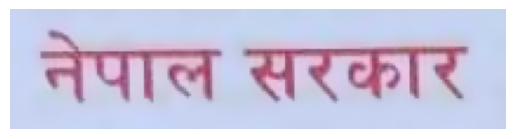

Image: 0.png
Extracted Text: नेपाल सरकार
----------------------------------------


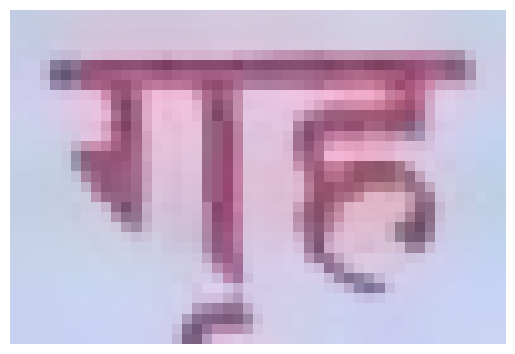

Image: 1.png
Extracted Text: "GTुहुन्ड
----------------------------------------


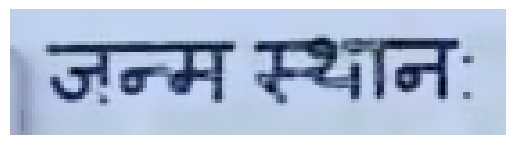

Image: 10.png
Extracted Text: जन्म स्थान:
----------------------------------------


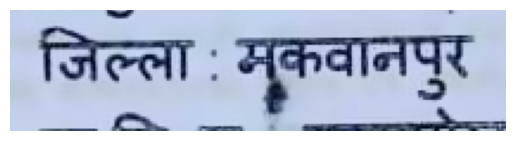

Image: 11.png
Extracted Text: जिल्ला: मुकवानपूरू
----------------------------------------


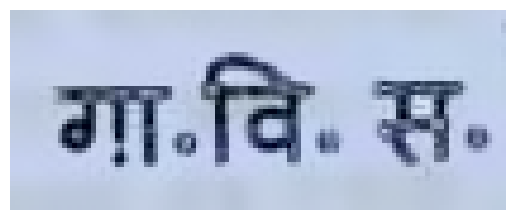

Image: 12.png
Extracted Text: गा. वि. स.
----------------------------------------


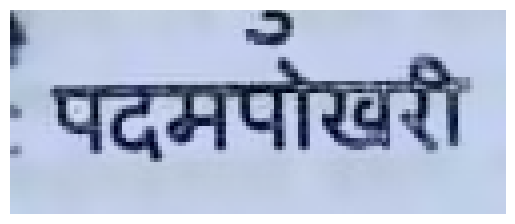

Image: 13.png
Extracted Text: 'पदमपाँखर्री
----------------------------------------


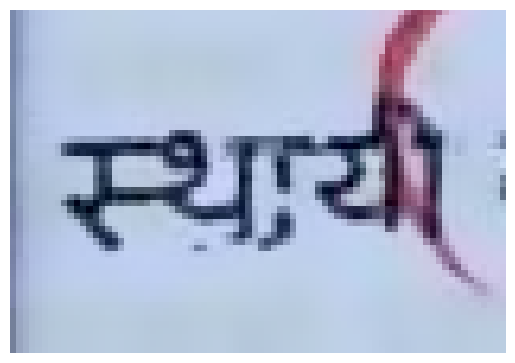

Image: 14.png
Extracted Text: स्था;यै
----------------------------------------


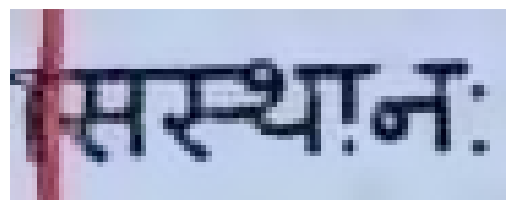

Image: 15.png
Extracted Text: ससस्था. ने:
----------------------------------------


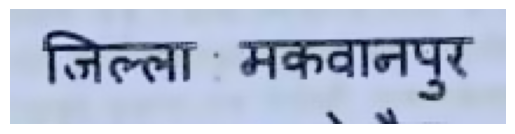

Image: 16.png
Extracted Text: जिल्ला 'मक्वानपुर
----------------------------------------


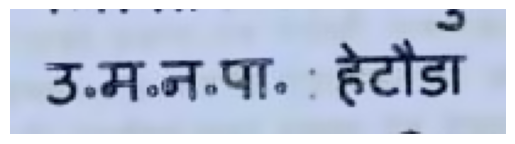

Image: 17.png
Extracted Text: उ. म. न. पा.- हेटौडाँ
----------------------------------------


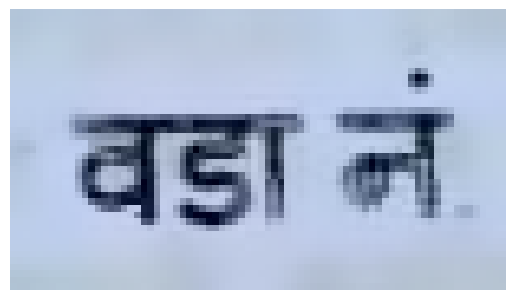

Image: 18.png
Extracted Text: वडा नं
----------------------------------------


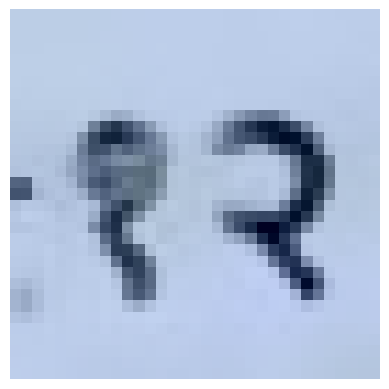

Image: 19.png
Extracted Text: - 2 2
----------------------------------------


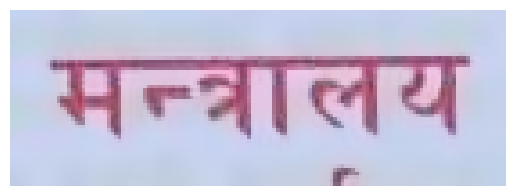

Image: 2.png
Extracted Text: सन्त्राल्य
----------------------------------------


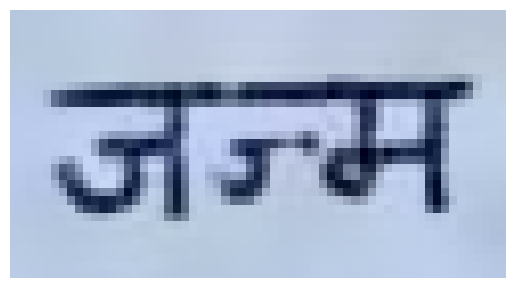

Image: 20.png
Extracted Text: जङ्झम
----------------------------------------


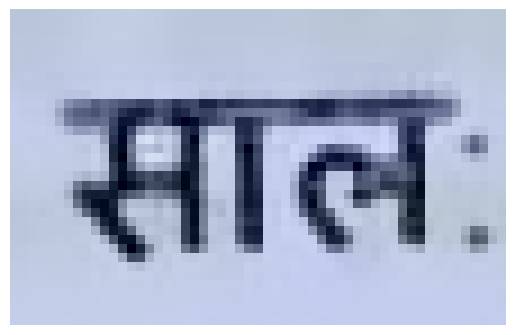

Image: 21.png
Extracted Text: साल:
----------------------------------------


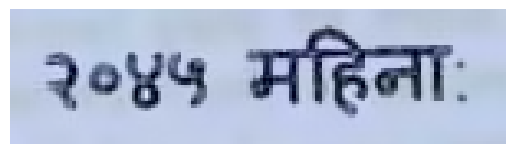

Image: 22.png
Extracted Text: २०४५ महिना:
----------------------------------------


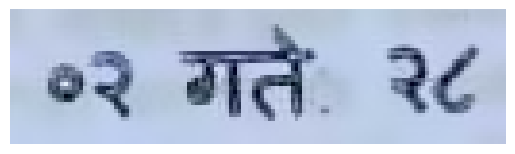

Image: 23.png
Extracted Text: ०२ गतै. २८
----------------------------------------


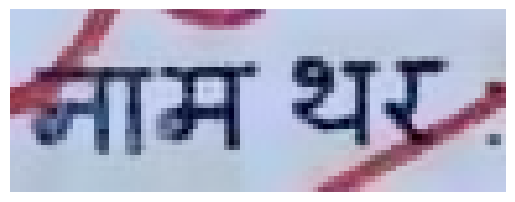

Image: 24.png
Extracted Text: नँना म. थु.-
----------------------------------------


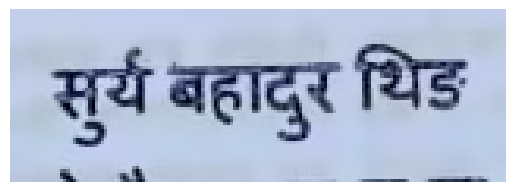

Image: 25.png
Extracted Text: सुर्य बहादुर थिङ्
----------------------------------------


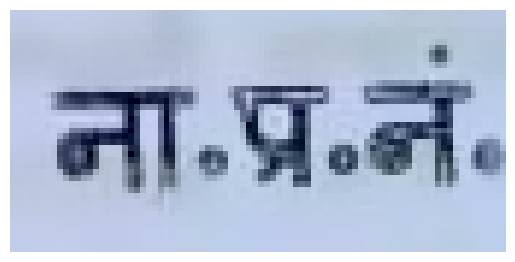

Image: 26.png
Extracted Text: ना.प्र.नँ
----------------------------------------


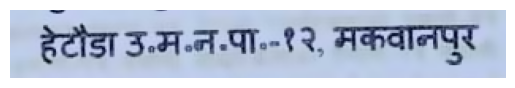

Image: 27.png
Extracted Text: हेटैड उभ न.पा.-१, मकवानपुर
----------------------------------------


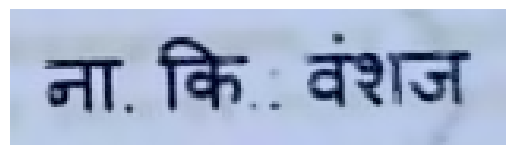

Image: 28.png
Extracted Text: ना. कि. वंशज
----------------------------------------


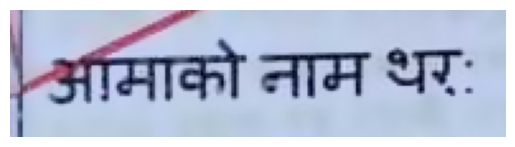

Image: 29.png
Extracted Text: आमाको नाम थग:
----------------------------------------


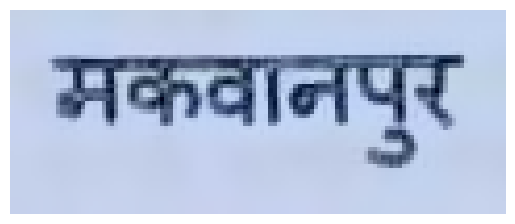

Image: 3.png
Extracted Text: मकवानपुर
----------------------------------------


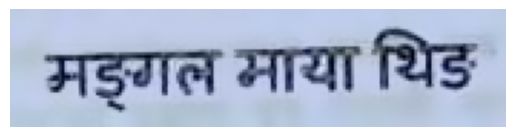

Image: 30.png
Extracted Text: मङ्गल माथा थिङ
----------------------------------------


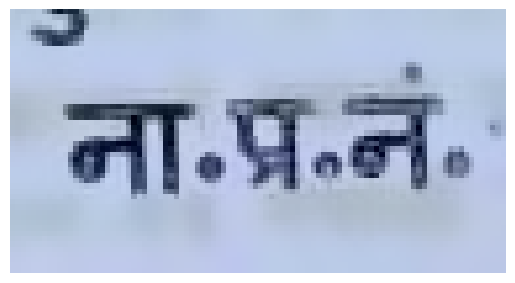

Image: 31.png
Extracted Text: ना.प्र.न.
----------------------------------------


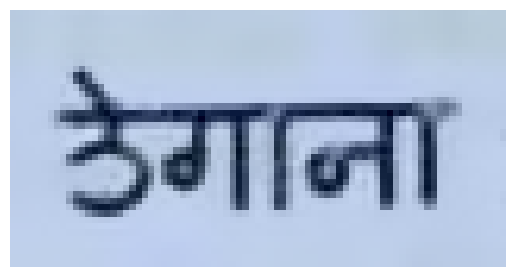

Image: 32.png
Extracted Text: डेगाना
----------------------------------------


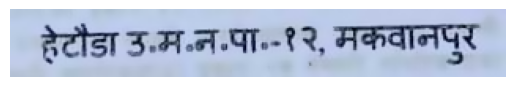

Image: 33.png
Extracted Text: हेटैड उभन सा.-१, मकवान्युर
----------------------------------------


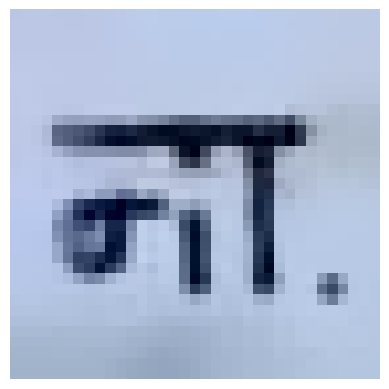

Image: 34.png
Extracted Text: FGT.
----------------------------------------


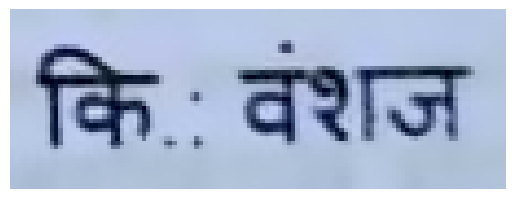

Image: 35.png
Extracted Text: कि: वंशज
----------------------------------------


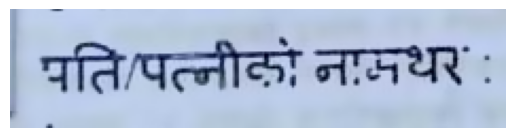

Image: 36.png
Extracted Text: मति/पत्नीको न. मथर:
----------------------------------------


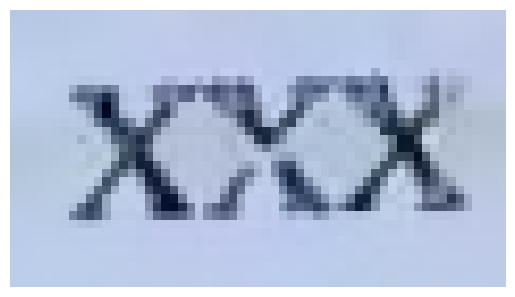

Image: 37.png
Extracted Text: Xyyy X*X%%%x%%
----------------------------------------


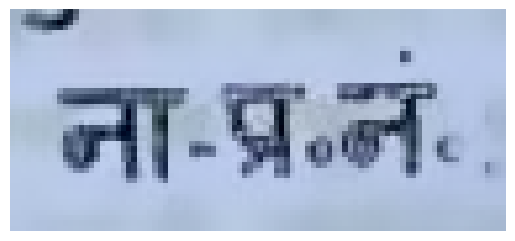

Image: 38.png
Extracted Text: ना-प्र नं.
----------------------------------------


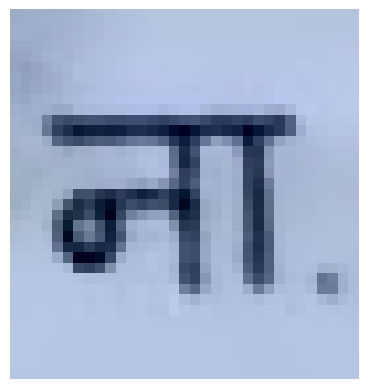

Image: 39.png
Extracted Text: "ना
----------------------------------------


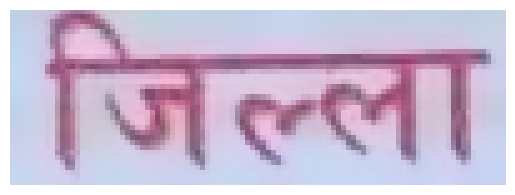

Image: 4.png
Extracted Text: जिल्ला
----------------------------------------


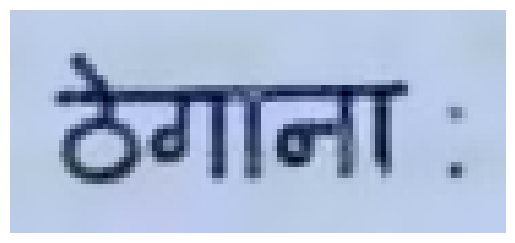

Image: 40.png
Extracted Text: ठेगाना :
----------------------------------------


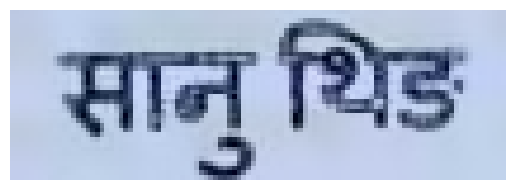

Image: 41.png
Extracted Text: सानु थिङ
----------------------------------------


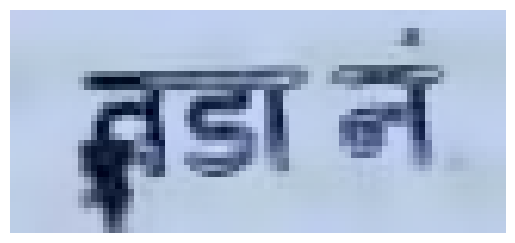

Image: 42.png
Extracted Text: ब्लडा नं
----------------------------------------


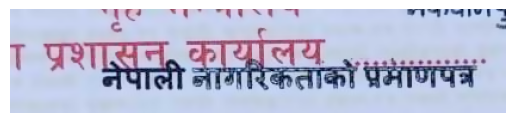

Image: 5.png
Extracted Text: प्रृणझँल: क्यकर्फल्तयको पृभाणैन:
----------------------------------------


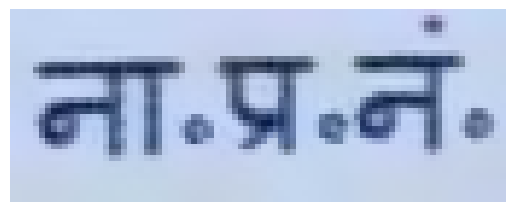

Image: 6.png
Extracted Text: ना. प्र. न.- नं.-
----------------------------------------


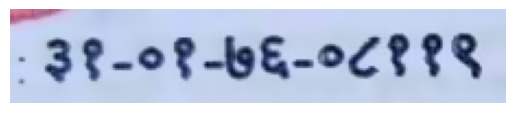

Image: 7.png
Extracted Text: ३१-०१-७६-०८१११
----------------------------------------


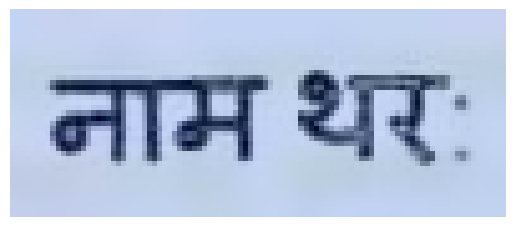

Image: 8.png
Extracted Text: नाम थर:
----------------------------------------


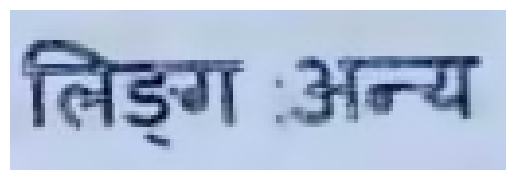

Image: 9.png
Extracted Text: लिङ्ग :अन्य
----------------------------------------


In [10]:
image_dir = 'ocrdataset/cropped_images/'

nepali_mapping = {'ः': '¶','ऊ': '§','ऋ': '†','ऌ': '‡','ऐ': '‰','ङ': '¤','ञ': '¢','ॐ': '£','ॠ': '¿',
        '०': '∞','१': '∑','२': '∂','३': '∇','४': '∆','५': '⌘','६': '≈','७': '≠','८': '¢','९': '¥'}
nepali_reverse_mapping = {v: k for k, v in nepali_mapping.items()}

def replace_chars(extracted_text, char_map):
    return ''.join(char_map.get(char, char) for char in extracted_text)


for image_name in sorted(os.listdir(image_dir)):
    if image_name.endswith('.png'):
        image_path = os.path.join(image_dir, image_name)
        
        # Detect text using the OCR model
        extracted_text = ocr_detect(image_path)
        extracted_text = replace_chars(extracted_text, nepali_reverse_mapping)
            
        
        # Print the extracted text
        print(f"Image: {image_name}")
        print("Extracted Text:", extracted_text)
        print("-" * 40)